In [55]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Investing in Austin - Regression Model

<h3 style='color:skyblue'><strong>Data Cleaning (from cluster_code)</strong></h3>


In [56]:
data_path = 'airbnb_listings_austin.csv'
df = pd.read_csv(data_path)

# only keep property-related columns, no unique text columns
columns_to_drop = ["id", "listing_url", "name", "summary", "space", "description","amenities", "experiences_offered", "neighborhood_overview", "notes", "transit", "host_id", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate", "host_is_superhost", "host_listings_count", "host_has_profile_pic", "host_identity_verified", "neighbourhood", "city"]
df = df.drop(columns=columns_to_drop)

# drop nonessential columns with too many NaN values
columns_to_drop = ["square_feet", "weekly_price", "security_deposit", "cleaning_fee"]
df = df.drop(columns=columns_to_drop)

# clean data types and values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df['has_availability'] = df['has_availability'].map({'f': False, 't': True}).astype(bool)
df['instant_bookable'] = df['instant_bookable'].map({'f': False, 't': True}).astype(bool)

df = df.dropna()

# preview data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 5832
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                3741 non-null   object 
 1   room_type                    3741 non-null   object 
 2   accommodates                 3741 non-null   int64  
 3   bathrooms                    3741 non-null   float64
 4   bedrooms                     3741 non-null   float64
 5   beds                         3741 non-null   float64
 6   bed_type                     3741 non-null   object 
 7   price                        3741 non-null   float64
 8   guests_included              3741 non-null   int64  
 9   extra_people                 3741 non-null   float64
 10  minimum_nights               3741 non-null   int64  
 11  has_availability             3741 non-null   bool   
 12  availability_30              3741 non-null   int64  
 13  availability_60        

In [57]:
# numeric only dataframe
df_num = df.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'has_availability', 'instant_bookable'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 5832
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3741 non-null   int64  
 1   bathrooms                    3741 non-null   float64
 2   bedrooms                     3741 non-null   float64
 3   beds                         3741 non-null   float64
 4   price                        3741 non-null   float64
 5   guests_included              3741 non-null   int64  
 6   extra_people                 3741 non-null   float64
 7   minimum_nights               3741 non-null   int64  
 8   availability_30              3741 non-null   int64  
 9   availability_60              3741 non-null   int64  
 10  availability_90              3741 non-null   int64  
 11  availability_365             3741 non-null   int64  
 12  number_of_reviews            3741 non-null   int64  
 13  review_scores_rating   

       accommodates    bathrooms     bedrooms         beds        price  \
count   3741.000000  3741.000000  3741.000000  3741.000000  3741.000000   
mean       4.431970     1.435044     1.707832     2.251804   223.703288   
std        2.759909     0.710448     1.136848     1.704414   254.290150   
min        1.000000     0.000000     0.000000     1.000000    14.000000   
25%        2.000000     1.000000     1.000000     1.000000    85.000000   
50%        4.000000     1.000000     1.000000     2.000000   149.000000   
75%        6.000000     2.000000     2.000000     3.000000   250.000000   
max       16.000000     7.000000    10.000000    16.000000  2549.000000   

       guests_included  extra_people  minimum_nights  availability_30  \
count      3741.000000   3741.000000     3741.000000      3741.000000   
mean          2.065758     15.201283        2.121091        16.451484   
std           1.863369     29.054722        6.677725        11.375793   
min           0.000000      0.00

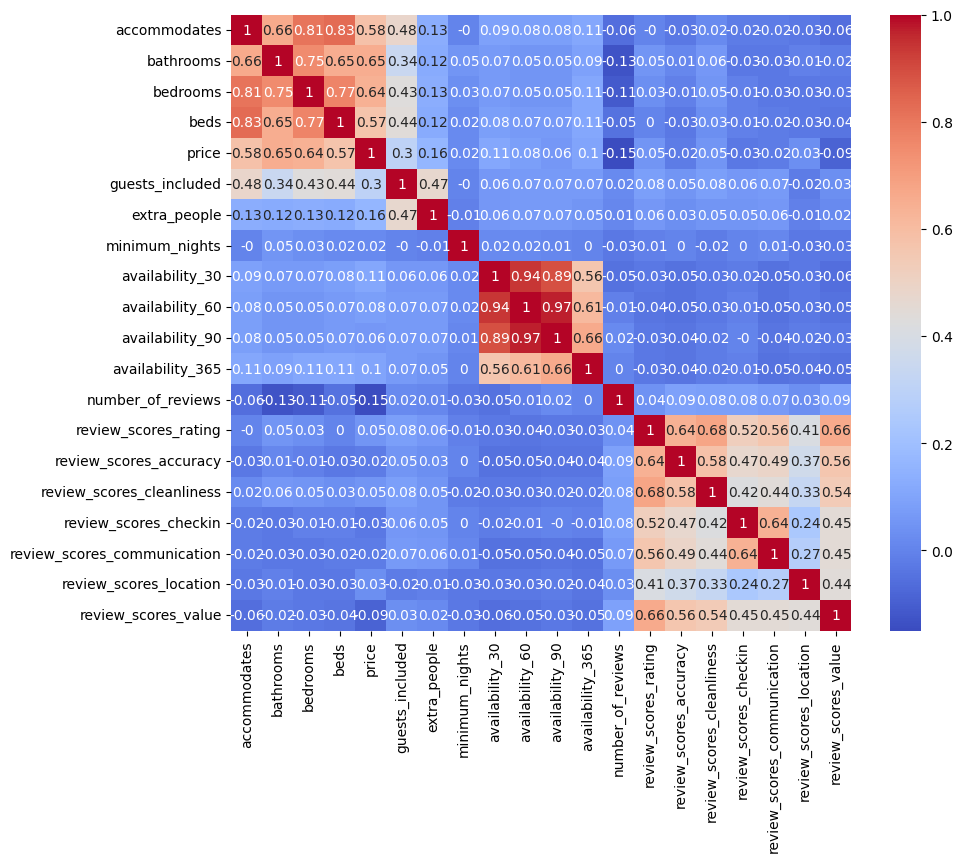

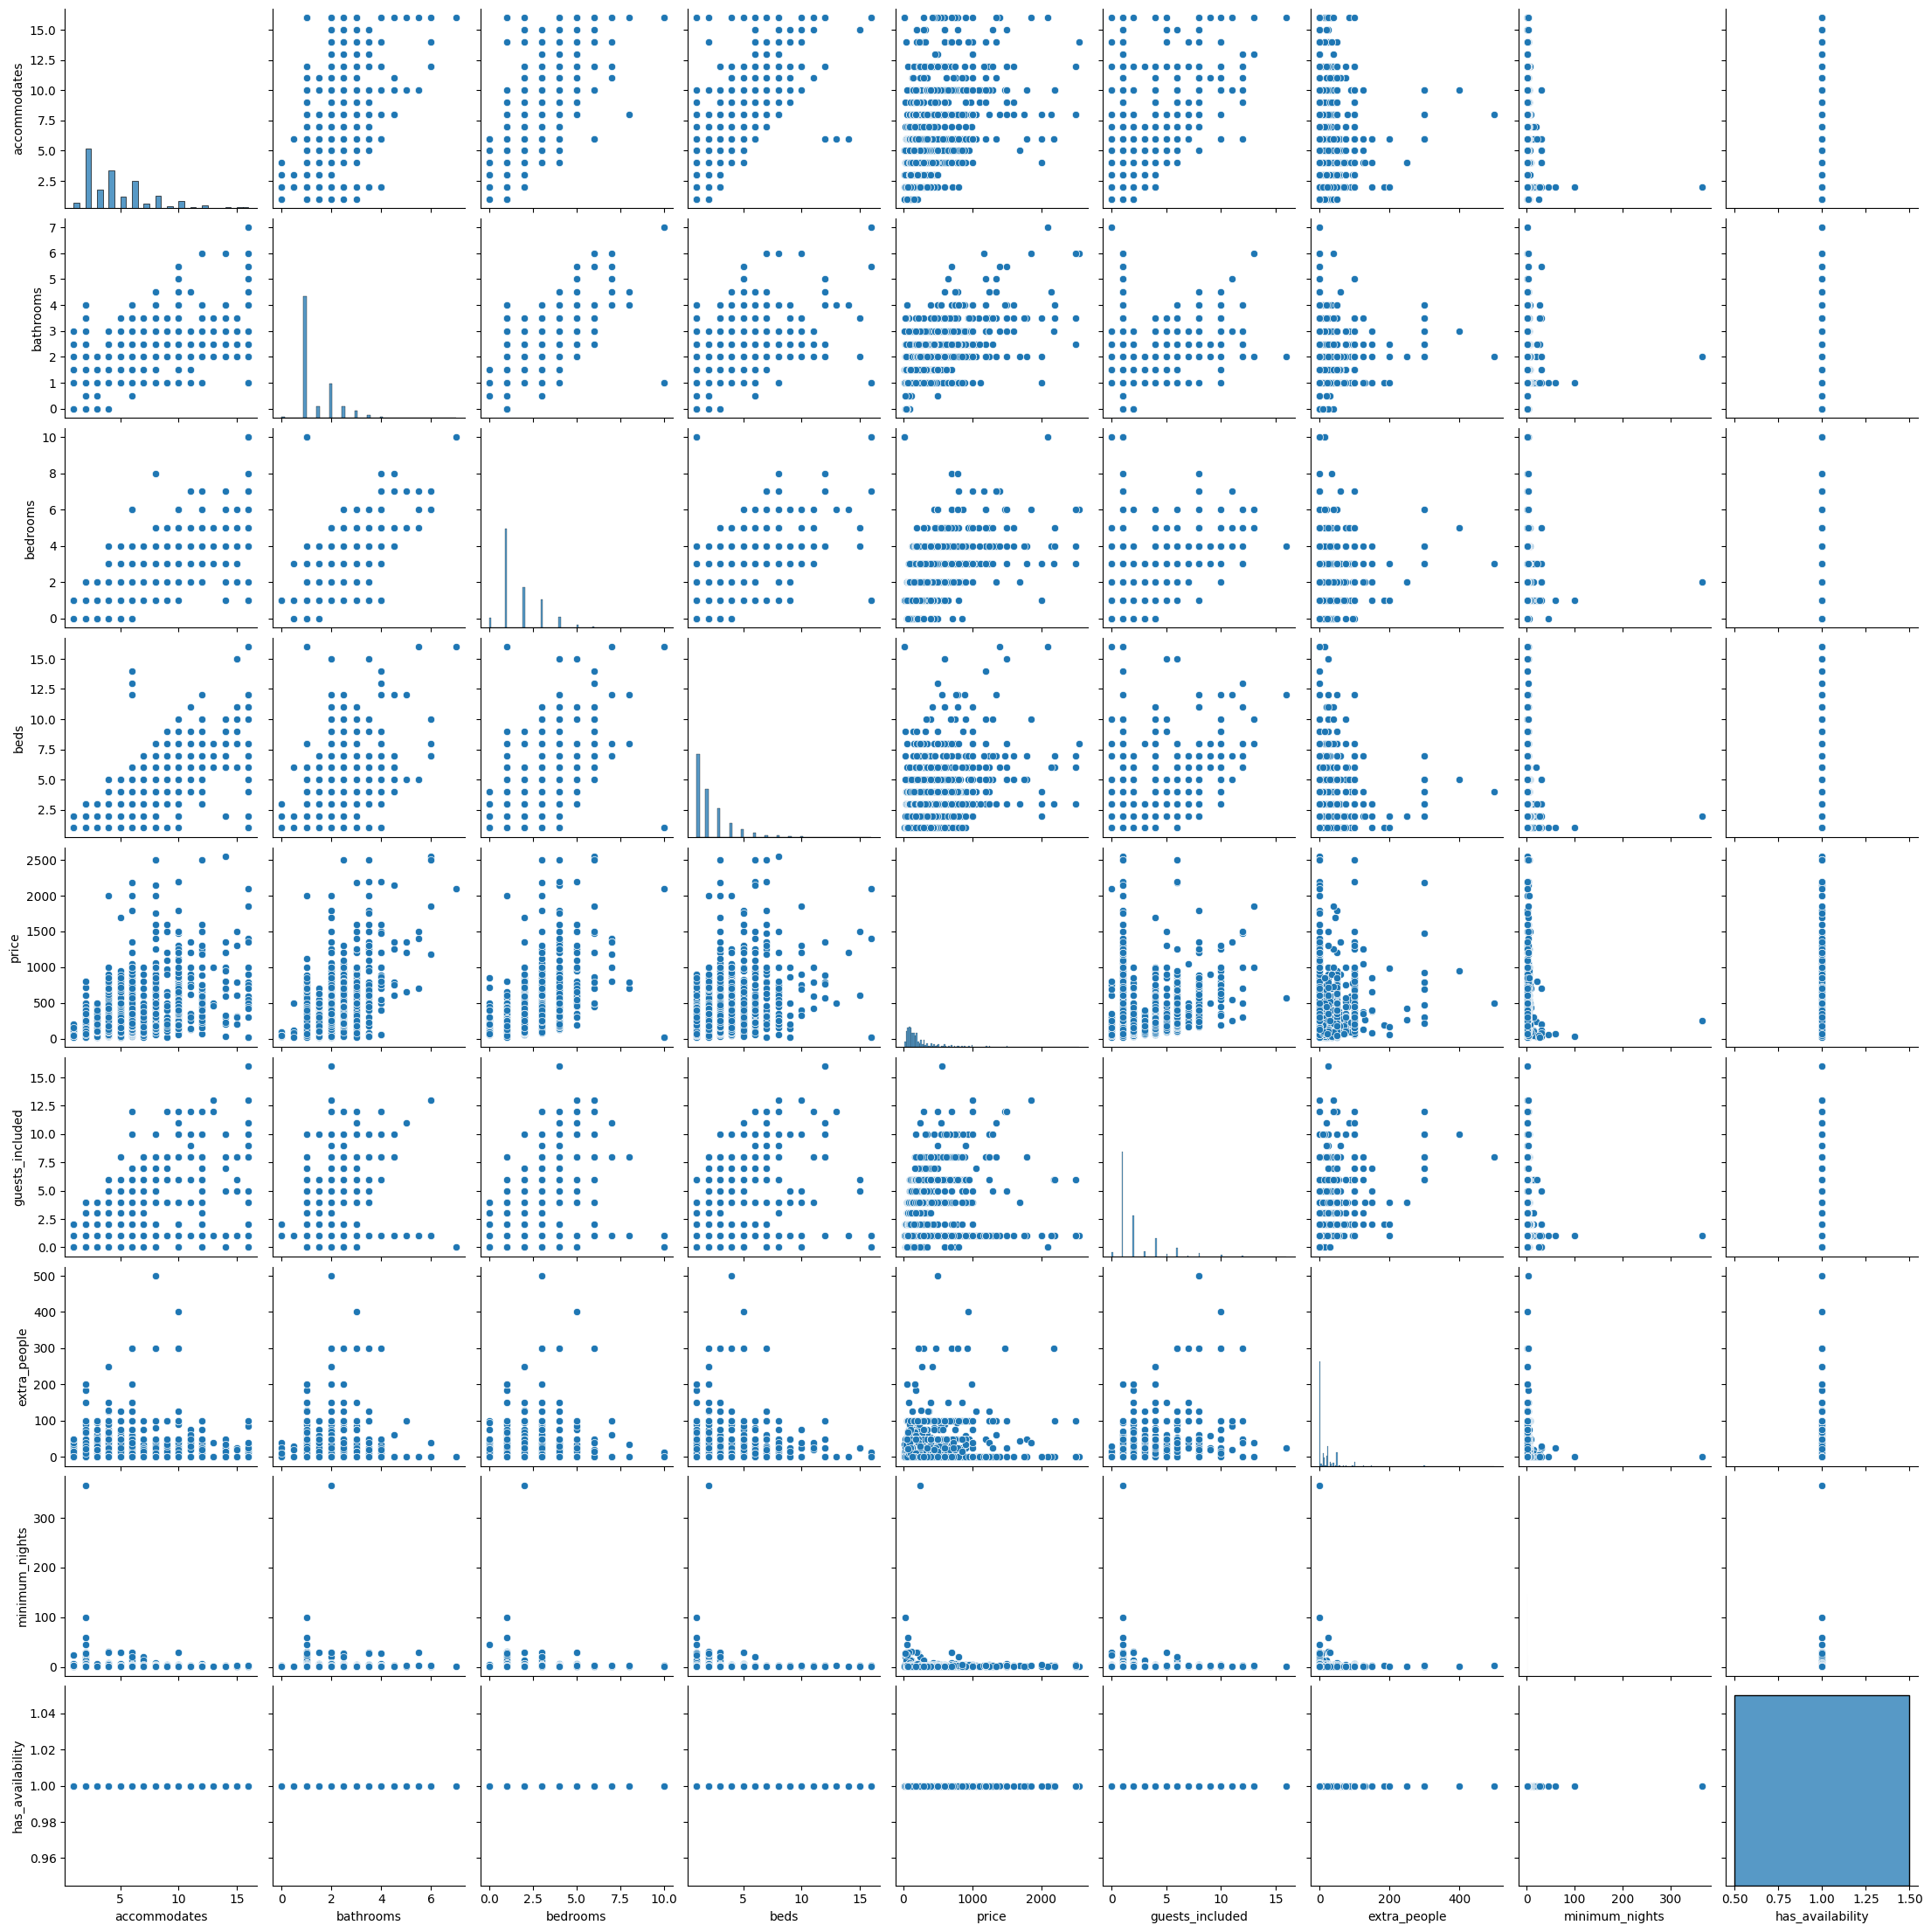

In [58]:
# Display summary statistics for numeric variables
print(df.describe())

# Compute correlations
cormat = df_num.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(df.iloc[:,:12])
plt.show()

<h3 style='color:skyblue'><strong>Full Regression Model</strong></h3>


In [59]:
# Fit full regression
X = df_num.drop(columns=['price'])
y = df['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:33:58   Log-Likelihood:                -24684.
No. Observations:                3741   AIC:                         4.941e+04
Df Residuals:                    3721   BIC:                         4.953e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<h3 style='color:skyblue'><strong>Stepwise Variable Selection</strong></h3>


In [60]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [61]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  accommodates with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  const with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  extra_people with p-value 0.0000
Add  review_scores_value with p-value 0.0000
Drop const with p-value 0.1051
Add  review_scores_rating with p-value 0.0000
Add  review_scores_location with p-value 0.0000
Add  const with p-value 0.0000
Add  number_of_reviews with p-value 0.0000
Add  availability_30 with p-value 0.0002
Add  availability_90 with p-value 0.0003
Add  beds with p-value 0.0003
Add  guests_included with p-value 0.0051
resulting features:
['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'const', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included']


<h3 style='color:skyblue'><strong>Stepwise Model</strong></h3>


In [62]:
# Fit stepwise regression
X = df_num[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:33:59   Log-Likelihood:                -24690.
No. Observations:                3741   AIC:                         4.941e+04
Df Residuals:                    3728   BIC:                         4.949e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -238

In [63]:
#check for multicollinearity
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

                  Variable         VIF
0                    const  230.334032
1             accommodates    4.300251
2                bathrooms    2.394204
3                 bedrooms    3.981249
4             extra_people    1.314087
5      review_scores_value    1.895995
6     review_scores_rating    1.840673
7   review_scores_location    1.281652
8        number_of_reviews    1.055763
9          availability_30    4.778459
10         availability_90    4.756700
11                    beds    3.641871
12         guests_included    1.704245


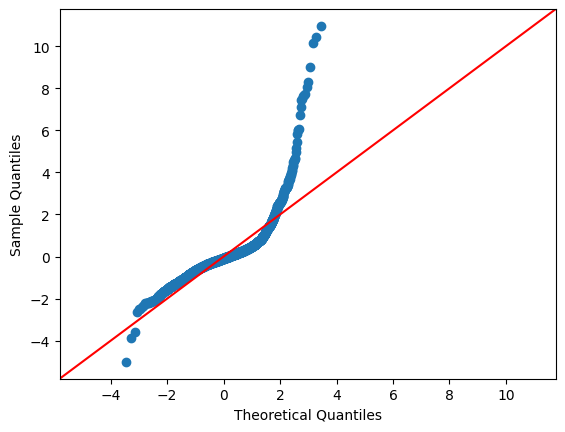

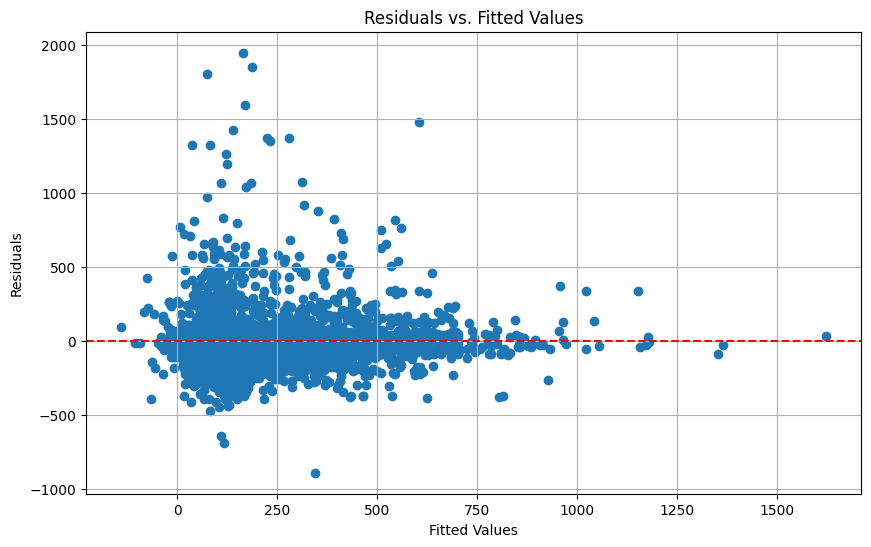

In [64]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>Log Model</strong></h3>


In [65]:
# log transformed regression
X = df_num[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included']]
X = sm.add_constant(X)
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     350.0
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:33:59   Log-Likelihood:                -3244.2
No. Observations:                3741   AIC:                             6514.
Df Residuals:                    3728   BIC:                             6595.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

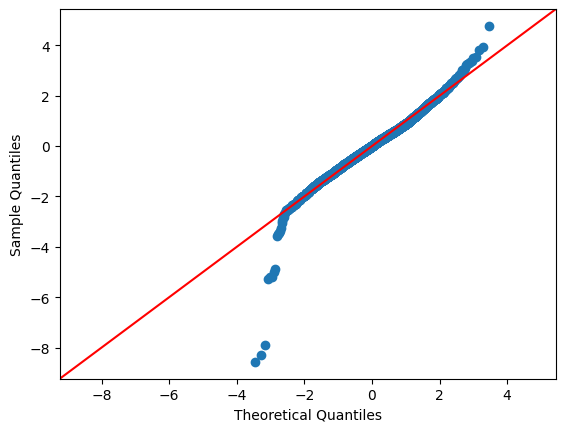

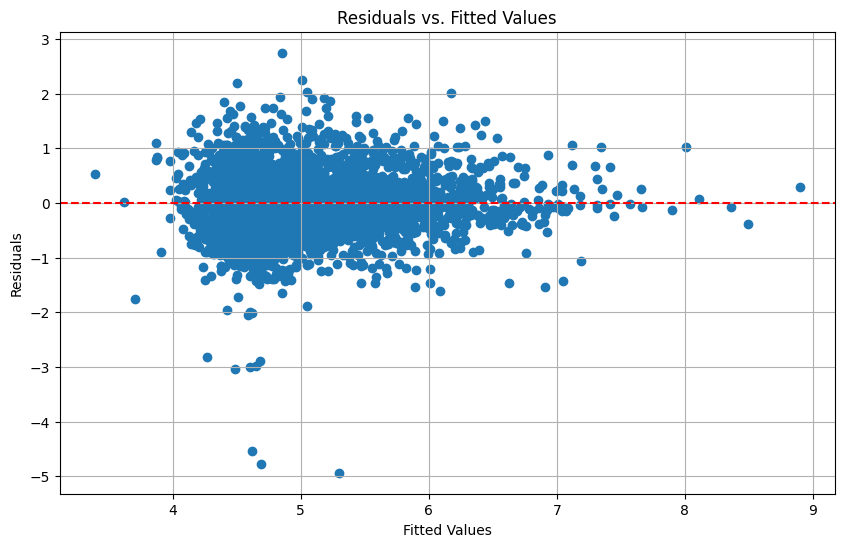

In [66]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>Square Root Model</strong></h3>


In [67]:
# Square Root transformed regression
X = df_num[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:33:59   Log-Likelihood:                -10663.
No. Observations:                3741   AIC:                         2.135e+04
Df Residuals:                    3728   BIC:                         2.143e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

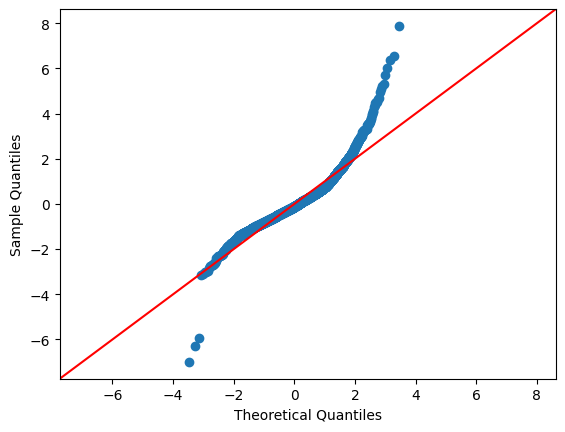

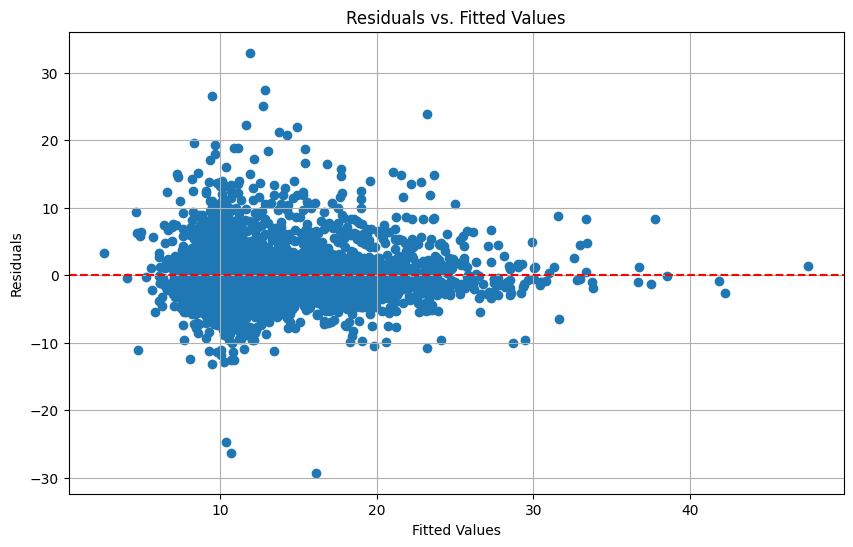

In [68]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>Add Back Categorical Values Using Dummy Variables</strong></h3>
<h3 style='color:skyblue'><strong>Categorical - Log Model</strong></h3>



In [69]:
# log transformed regression including categorical variables
X = df[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'has_availability', 'instant_bookable']]
X = pd.get_dummies(X, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'has_availability', 'instant_bookable'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg2 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     200.4
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:34:00   Log-Likelihood:                -2499.5
No. Observations:                3741   AIC:                             5081.
Df Residuals:                    3700   BIC:                             5336.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

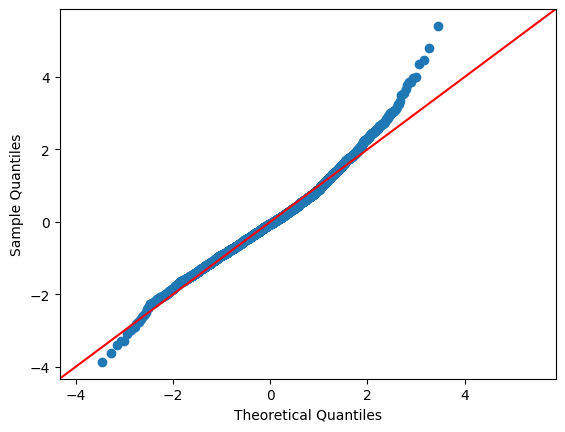

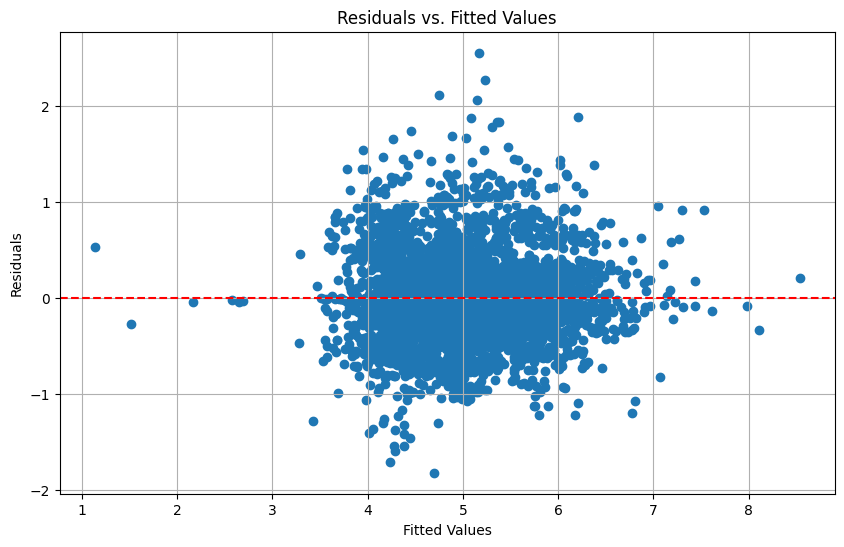

In [70]:
# Calculate residuals
residuals = logreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>Categorical - Square Root Model</strong></h3>


In [71]:
# square root transformed regression including categorical variables
X = df[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'beds', 'guests_included', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'has_availability', 'instant_bookable']]
X = pd.get_dummies(X, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'has_availability', 'instant_bookable'], drop_first=True, dtype='float')
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:34:00   Log-Likelihood:                -10349.
No. Observations:                3741   AIC:                         2.078e+04
Df Residuals:                    3700   BIC:                         2.103e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<h3 style='color:skyblue'><strong>9.) Fit Final Model</strong></h3>

<h5 style='color:skyblue'>The log regresssion with categorical variables had the best adjusted R-squared BUT there are insignificant p-values so we remove those and rerun the model</h5>

In [76]:
# remove insignificant variables
# after testing - property_type, guests_included, cancellation_policy, & beds need to be removed
X = df[['accommodates', 'bathrooms', 'bedrooms', 'extra_people', 'review_scores_value', 'review_scores_rating', 'review_scores_location', 'number_of_reviews', 'availability_30', 'availability_90', 'room_type', 'bed_type','has_availability', 'instant_bookable']]
X = pd.get_dummies(X, columns=['room_type', 'bed_type', 'has_availability', 'instant_bookable'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg3 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:                -2640.0
No. Observations:                3741   AIC:                             5316.
Df Residuals:                    3723   BIC:                             5428.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

<h3 style='color:skyblue'><strong>The Adj R-Squared dropped slightly, but now only significant values remain</strong></h3>


In [77]:
#check for multicollinearity (VIF)
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

                  Variable         VIF
0                    const  329.266685
1             accommodates    3.282650
2                bathrooms    2.399973
3                 bedrooms    3.796372
4             extra_people    1.028491
5      review_scores_value    1.918549
6     review_scores_rating    1.847448
7   review_scores_location    1.294812
8        number_of_reviews    1.072656
9          availability_30    4.801893
10         availability_90    4.770021
11  room_type_Private room    1.385183
12   room_type_Shared room    1.311912
13          bed_type_Couch    1.413728
14          bed_type_Futon    2.206793
15  bed_type_Pull-out Sofa    1.353868
16       bed_type_Real Bed    2.993954
17   instant_bookable_True    1.018160


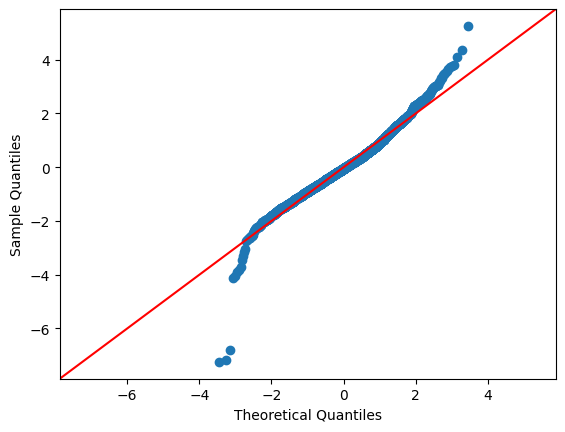

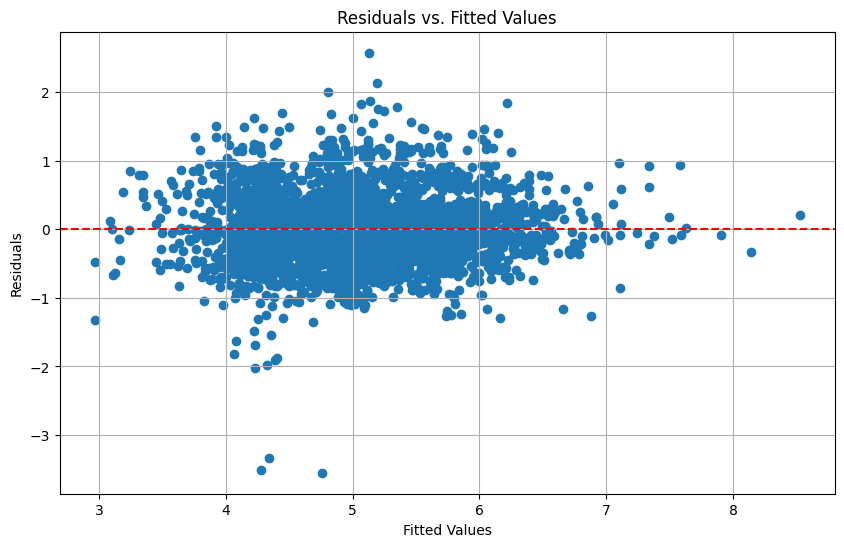

In [78]:
# Calculate residuals
residuals = logreg3.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg3.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()